In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, XGBRFClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('baseball.csv')

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,Unnamed: 17
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,NaN
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,NaN
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,NaN
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,NaN
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,NaN


In [38]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E', 'Unnamed: 17', 'labels'],
      dtype='object')

In [40]:
df.drop('Unnamed: 17', axis=1,inplace=True)

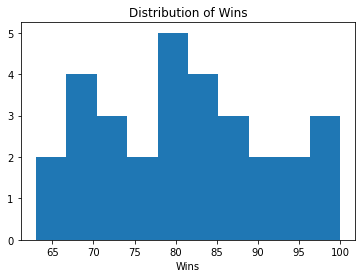

In [41]:
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [42]:
df['W'].mean()

80.96666666666667

#### create win labels column for classification

In [43]:
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <= 69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5
    
df['win_bins'] = df['W'].apply(assign_win_bins)

In [44]:
df.corr()['W']

W           1.000000
R           0.430751
AB         -0.087947
H           0.037612
2B          0.427797
3B         -0.251118
HR          0.307407
BB          0.484342
SO          0.111850
SB         -0.157234
RA         -0.812952
ER         -0.809435
ERA        -0.819600
CG          0.080533
SHO         0.471805
SV          0.666530
E          -0.089485
labels     -0.211600
win_bins    0.917736
Name: W, dtype: float64

#### Adding one more feature using K-means clustering

In [45]:
attributes = ['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']

In [46]:
data_attributes = df[attributes]

In [47]:

df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,labels,win_bins
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,2,4
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,1,3
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,3,3
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,3,3
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,4,3


In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [12]:
score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters = i, random_state=1)
    l = km.fit_predict(data_attributes)
    score = metrics.silhouette_score(data_attributes,l)
    score_dict[i] = score

In [13]:
score_dict

{2: 0.19987395830177135,
 3: 0.19367511526637032,
 4: 0.20534252359995925,
 5: 0.19225361856772363,
 6: 0.16915810456354752,
 7: 0.17853672357167702,
 8: 0.19221282760051234,
 9: 0.19195420257562598,
 10: 0.15022753617670467}

In [14]:
kmeans_model = KMeans(n_clusters = 6, random_state=1)

In [15]:
distances = kmeans_model.fit_transform(data_attributes)

In [16]:
distances

array([[447.04281675, 395.2289435 , 161.45625576, 289.05417325,
        381.64277214, 320.13075134],
       [191.25539089,  64.95233314, 244.36360516, 134.98312619,
        199.90667454, 188.28362233],
       [208.15677556, 220.02794121, 220.66185788, 134.36424955,
        311.37328486, 212.83683336],
       [244.07480584, 117.0262625 , 203.94132128, 115.65051049,
        180.74926148, 210.13256163],
       [374.73153169, 245.68367775, 230.88201473, 285.18808617,
         95.20143762, 213.8959611 ],
       [333.93861518, 341.47992979, 256.07731865, 335.65887686,
        361.78595623, 193.52592616],
       [235.43485726, 199.99535023, 205.26949487, 235.37510632,
        228.34344423,  90.80147331],
       [187.84283646,  80.80515112, 293.93718398, 216.50829572,
        219.91862842, 200.47073252],
       [133.29023537,  89.00324627, 271.28696564, 172.3226906 ,
        245.99021673, 199.61386569],
       [375.90558249, 283.73614312, 121.51820738, 270.34003336,
        193.33118146, 170.9

Text(0.5, 1.0, 'kmeans clusters')

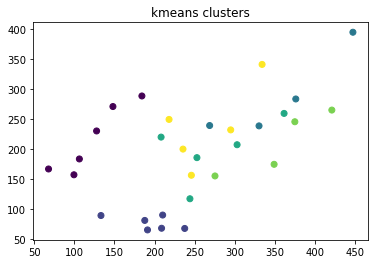

In [17]:
labels = kmeans_model.labels_
plt.scatter(distances[:,0],distances[:,1],c=labels)
plt.title('kmeans clusters')

In [21]:
df['labels'] = labels
attributes.append('labels')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E,Unnamed: 17,labels
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88,NaN,2
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86,NaN,1
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79,NaN,3
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101,NaN,3
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86,NaN,4


In [23]:
train = df.sample(frac = 0.75, random_state=1)
test = df.loc[~df.index.isin(train.index)]

In [24]:
x_train = train[attributes]
y_train = train['W']
x_test = test[attributes]
y_test = test['W']

### Linear regression model



In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [26]:
lr = LinearRegression(normalize=True)

In [27]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [28]:
predictions = lr.predict(x_test)

In [29]:
mae = mean_absolute_error(y_test,predictions)

In [30]:
mae

2.1316282072803006e-14

Recall that the average number of wins is about 79 wins. On average, the model is off by about 2.13 wins.

### Ridge regression model



In [31]:
from sklearn.linear_model import RidgeCV

In [33]:
rm = RidgeCV(alphas=(0.01,0.1,1,10),normalize=True)

In [34]:
rm.fit(x_train,y_train)


RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]), normalize=True)

In [35]:
predictions = rm.predict(x_test)

In [36]:
mae_rm = mean_absolute_error(y_test,predictions)
mae_rm

0.7363566242169366

Ridge regression model is better than linear regression model because it has less mean absolute error.